In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


train_data = pd.read_csv("Data/CE802_P3_Data.csv",sep=',')
test_data = pd.read_csv("Data/CE802_P3_Test.csv",sep=',')
file_name="Data/CE802_P3_Test_MLP.csv"


Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,Very high,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,Medium,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,Medium,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,Very high,-22863.72,-3.12,-54.36,2424.42,109.19


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,NaN


In [4]:

cleanup = {"F12": {"Very low":1, "Low":2, "Medium":3, "High":4, "Very high":5}}
train_data = train_data.replace(cleanup)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,4,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,1,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,2,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,2,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,1,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,5,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,3,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,3,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,5,-22863.72,-3.12,-54.36,2424.42,109.19


In [5]:
test = test_data.replace(cleanup)
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,2,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,3,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,2,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,4,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,2,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,5,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,1,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,2,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,3,-13748.25,-9.21,-18.96,1261.38,NaN


In [6]:
train_data = pd.get_dummies(train_data, columns= ['F4'])
train_data.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F4_Europe,F4_Rest,F4_UK,F4_USA
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,4,-15085.87,-12.93,-39.42,1734.58,3616.82,0,1,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,1,-15782.44,-8.55,-35.61,1672.70,3342.88,0,1,0,0
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,2,-10526.01,-9.66,-29.10,1462.86,0.00,0,0,1,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,2,-8327.14,-19.23,-34.59,809.46,1742.65,0,0,1,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,1,-14434.13,-9.45,-46.14,1435.90,373.56,0,0,0,1


In [7]:
# cleanup = {"F4": {"UK":1, "USA":2, "Europe":3, "Rest":4}}
# train_data = train_data.replace(cleanup)
# train_data.head()

In [8]:
test = pd.get_dummies(test, columns= ['F4'])
test.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F4_Europe,F4_Rest,F4_UK,F4_USA
0,28.70,0.82,-115.06,-280.95,581.10,0.06,214.35,2,2,-0.88,2,-14794.01,-15.09,-35.61,1578.68,NaN,0,0,0,1
1,5.40,6.90,-170.24,-228.00,330.54,0.31,-164.98,1,9,0.28,3,-11632.88,0.72,-29.73,1647.02,NaN,0,1,0,0
2,21.96,4.40,-219.12,-59.67,662.28,4.98,281.54,6,5,5.82,2,-12631.29,-23.61,-32.73,1449.14,NaN,0,1,0,0
3,10.52,1.02,-184.14,-211.23,506.55,0.57,-311.96,7,5,1.92,4,-26664.88,1.80,-22.92,911.98,NaN,0,0,1,0
4,2.00,0.58,-190.56,-284.82,649.41,0.05,291.47,8,3,-0.02,2,-9901.41,-13.47,-48.81,2251.04,NaN,0,1,0,0


In [9]:
# test = test.replace(cleanup)
# test.head()

In [10]:
X = train_data.drop('Target', axis=1)
y = train_data['Target']

X_test=test.drop('Target',axis=1)

In [11]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_test=scaler.fit_transform(X_test)

In [12]:
X_train, X_valid, y_train, y_valid =train_test_split(X, y,test_size = 0.2)

In [15]:
reg = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50,50),
                   activation="relu",learning_rate="adaptive",
                   max_iter=10000)

In [16]:
param_list = {"hidden_layer_sizes":[(50,50,50),(50,50,50,50),(50,50,50,50,50),(50,50,50,50,50,50),(50,50,50,50,50,50,50)],"activation":['identity', 'logistic', 'tanh', 'relu']}

In [17]:
gridsearch=GridSearchCV(reg, param_list, cv=5, return_train_score=True,scoring="neg_mean_squared_error",verbose=3, n_jobs=4)
gridsearch.fit(X, y)
reg=gridsearch.best_estimator_
print(reg)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 57.9min finished


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50, 50), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)


In [18]:
print("CV best score: ",gridsearch.cv_results_['mean_test_score'].mean())

CV best score:  -145700.7735487044


In [19]:
y_pred=reg.predict(X_valid)

In [20]:
print("The Score with ",(r2_score(y_pred, y_valid)))

The Score with  0.999639654234329


In [21]:
mse = mean_squared_error(y_pred,y_valid, )
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  404.16679071725616
RMSE:  202.08339535862808


In [22]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Record':range(0,len(y_valid)),'Actual': y_valid, 'Predicted': y_pred})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted
Record,,
0,0.00,7.439498
1,756.11,728.847769
2,2031.42,1952.626244
3,0.00,1.307790
4,929.99,921.073771
5,0.00,-9.644288
6,303.17,263.108112
7,390.46,389.431357
8,928.76,913.423189


ValueError: keyword grid_logy is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_contains', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

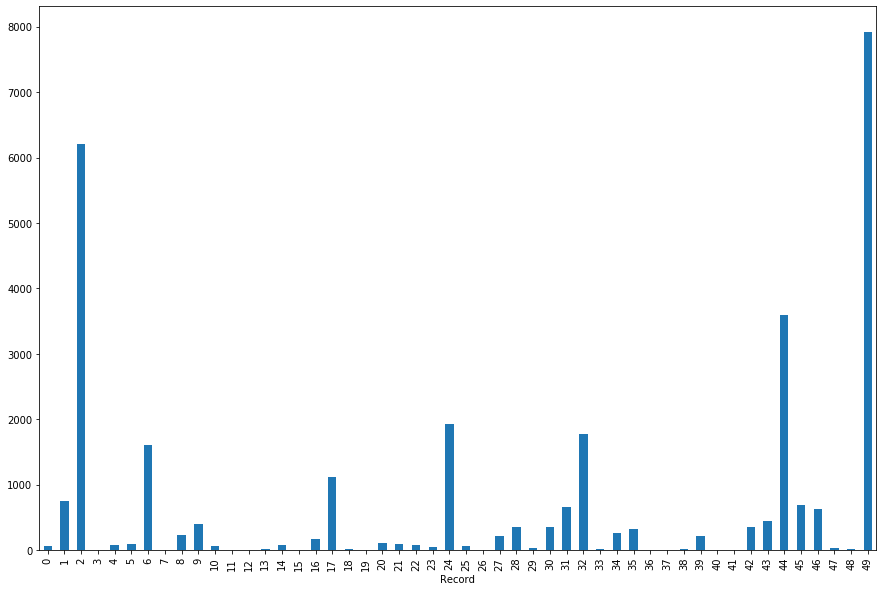

In [29]:
error = (df1['Actual'] - df1['Predicted'])**2

# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green',logy=True)
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black',logy=True)
plt.xticks(rotation=45)
plt.show()

In [24]:
mae = sum((y_valid-y_pred)**2) /len(y_pred)

In [25]:
mae

404.1667907172563

In [26]:
y_pred=reg.predict(X_test)
y_pred
for i in range(0,len(y_pred)):
    test_data.loc[i,'Target']=y_pred[i]


In [27]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,409.747904
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,-9.265268
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,3723.009341
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,2436.947432
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,-8.133336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,3862.730974
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,2674.803418
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,640.703160
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,-0.955878


In [28]:
test_data.to_csv(file_name, sep=',')

https://medium.com/analytics-vidhya/steps-you-should-follow-to-successfully-train-mlp-40a98c3b5bb3
https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e
https://datascience.stackexchange.com/questions/52348/gridsearchcv-with-mlpregressor-with-scikit-learn
https://datascience.stackexchange.com/questions/52348/gridsearchcv-with-mlpregressor-with-scikit-learn